In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#make sures matplotlib plots are displayed inline rather than seperate window
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##How many Survived?

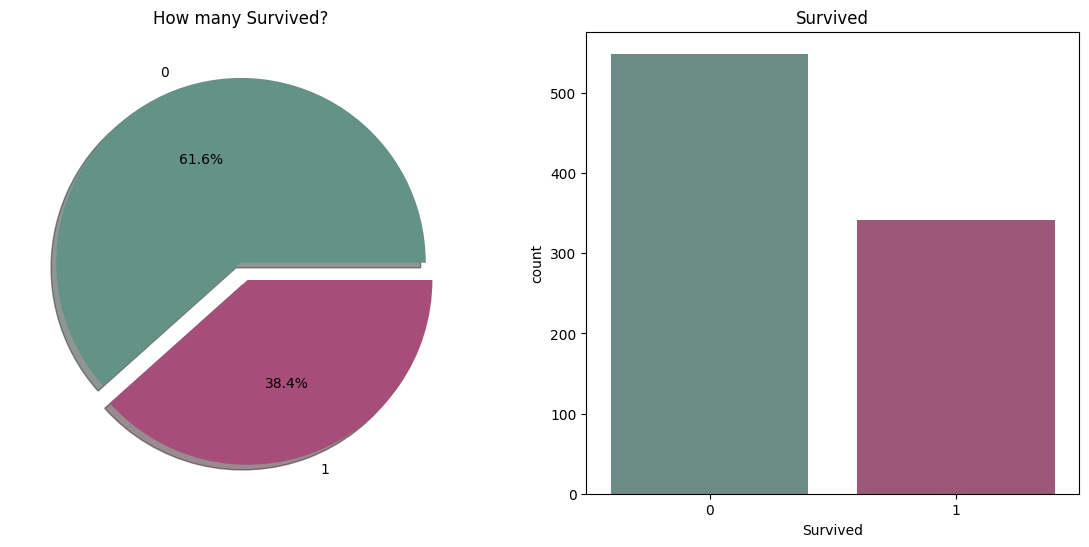

In [ ]:
f,ax = plt.subplots(1,2,figsize=(14,6))
#Pie Chart
df['Survived'].value_counts().plot.pie(
                            ax=ax[0],
                            autopct='%1.1f%%',
                            shadow=True,
                            explode=[0,0.1],
                            colors=['#659287','#A64D79']
)
ax[0].set_title('How many Survived?')
ax[0].set_ylabel('')

#Count plot
sns.countplot(x='Survived', data=df,ax=ax[1],palette=['#659287','#A64D79'])

ax[1].set_title('Survived')

plt.show()

##Analyzing the Features

In [ ]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

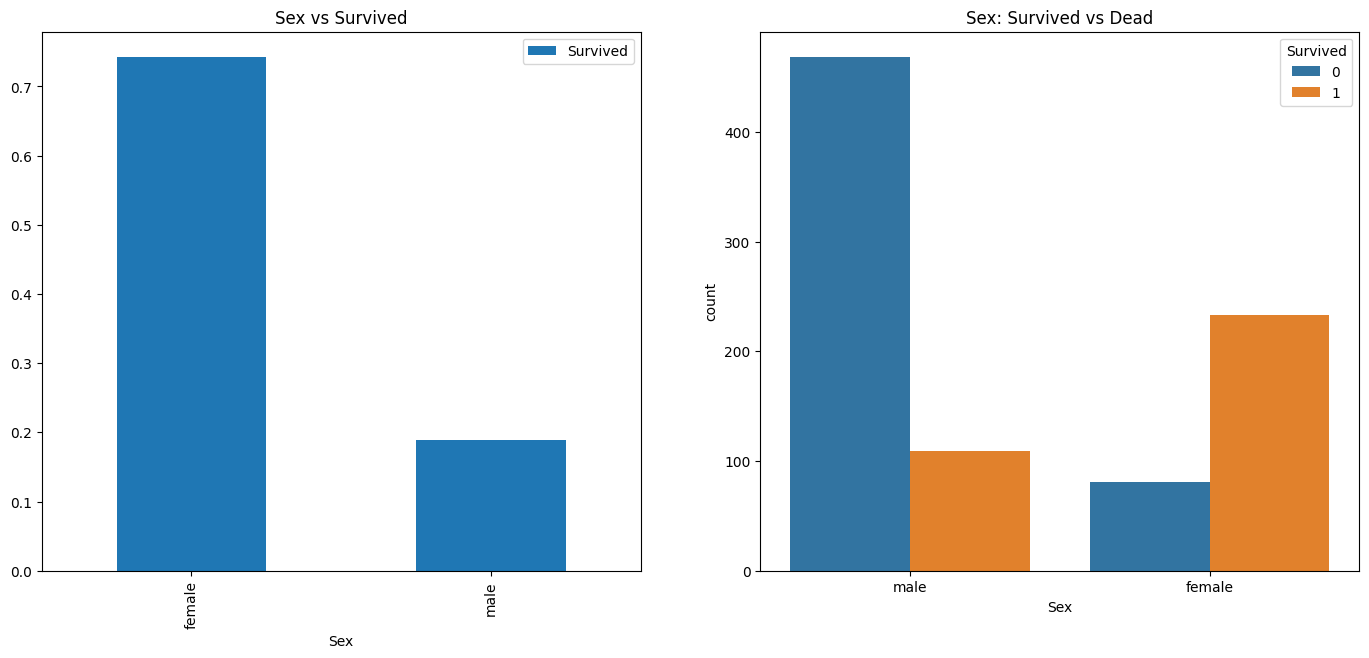

In [ ]:
f,ax = plt.subplots(1,2,figsize=[17,7])
#barchart
df[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex vs Survived')
sns.countplot(x='Sex',
              data=df,
              ax=ax[1],
              hue='Survived'
)
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


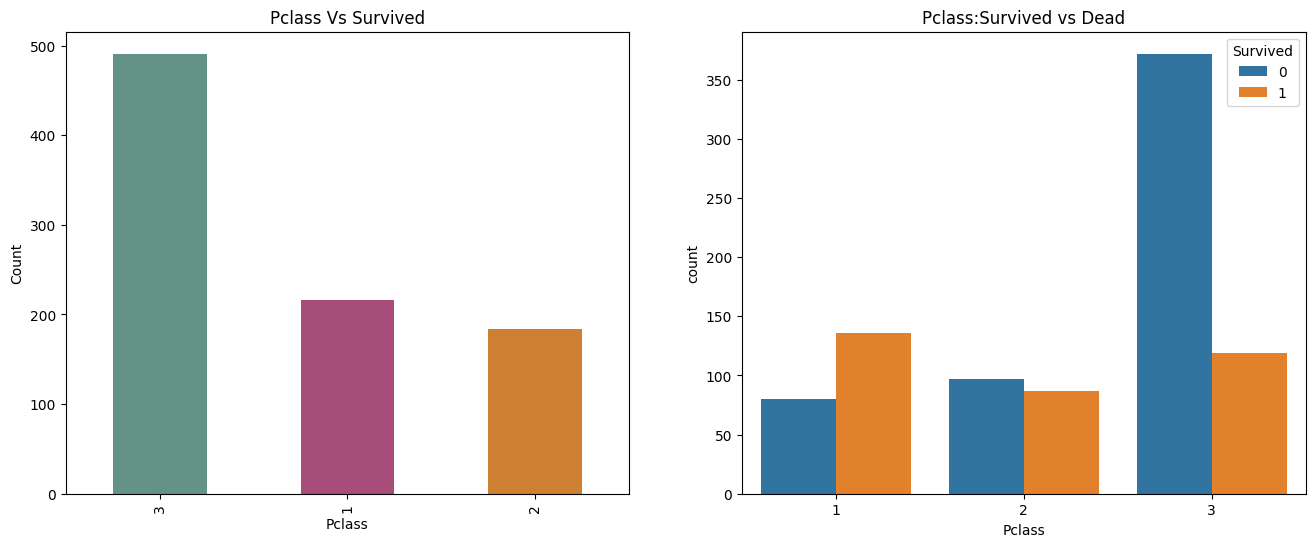

In [ ]:
f,ax = plt.subplots(1,2,figsize=[16,6])
#Bar chart
df['Pclass'].value_counts().plot.bar(ax=ax[0],
                                     color=['#659287','#A64D79','#CD7F32'])
ax[0].set_title('Pclass Vs Survived')
ax[0].set_ylabel('Count')

#Count plot
sns.countplot(x='Pclass',
              data=df,
              hue='Survived',
              ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

In [ ]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='Greens_r')

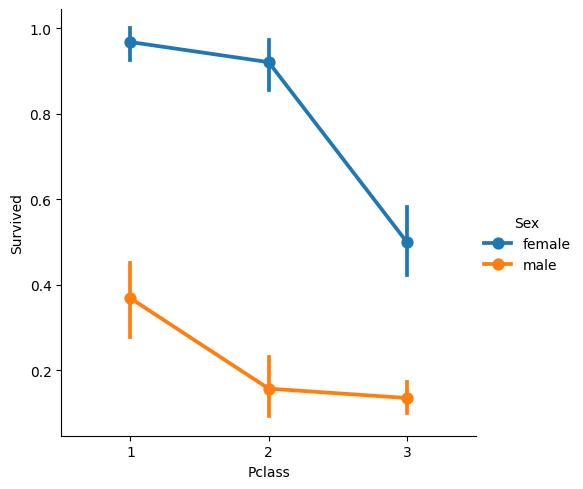

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='point')
plt.show()

In [ ]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


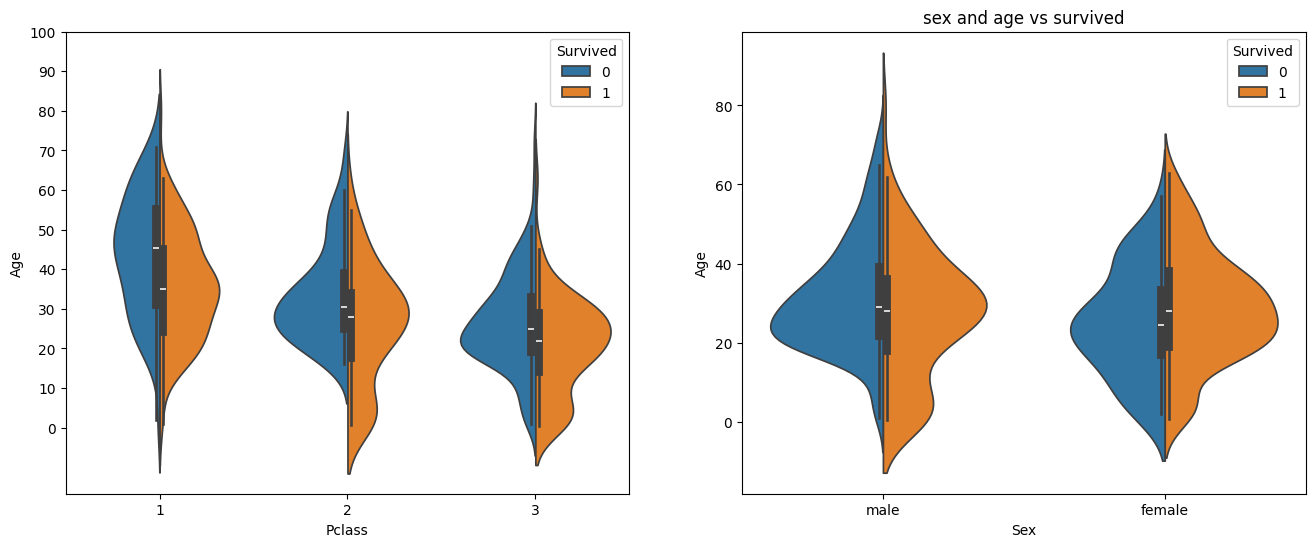

In [ ]:
f, ax = plt.subplots(1,2,figsize=[16,6])

#Pclass and age vs survived
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[1].set_title('Pclass and age vs survived')
ax[0].set_yticks(range(0,110,10))

#sex and age vs survived
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,ax=ax[1],split=True)
ax[1].set_title('sex and age vs survived')
ax[0].set_yticks(range(0,110,10))

plt.show()

In [ ]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
df.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [ ]:
df.Age.isna().any()

False

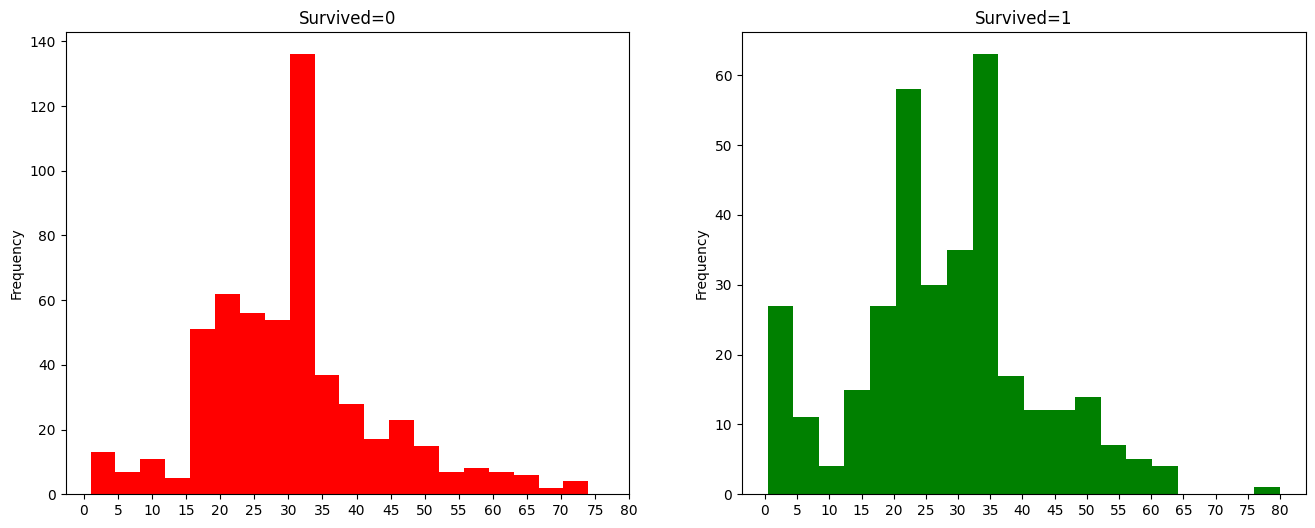

In [ ]:
f,ax = plt.subplots(1,2,figsize=[16,6])

df[df['Survived']==0].Age.plot.hist(ax=ax[0],color='red',bins=20)
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20)
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

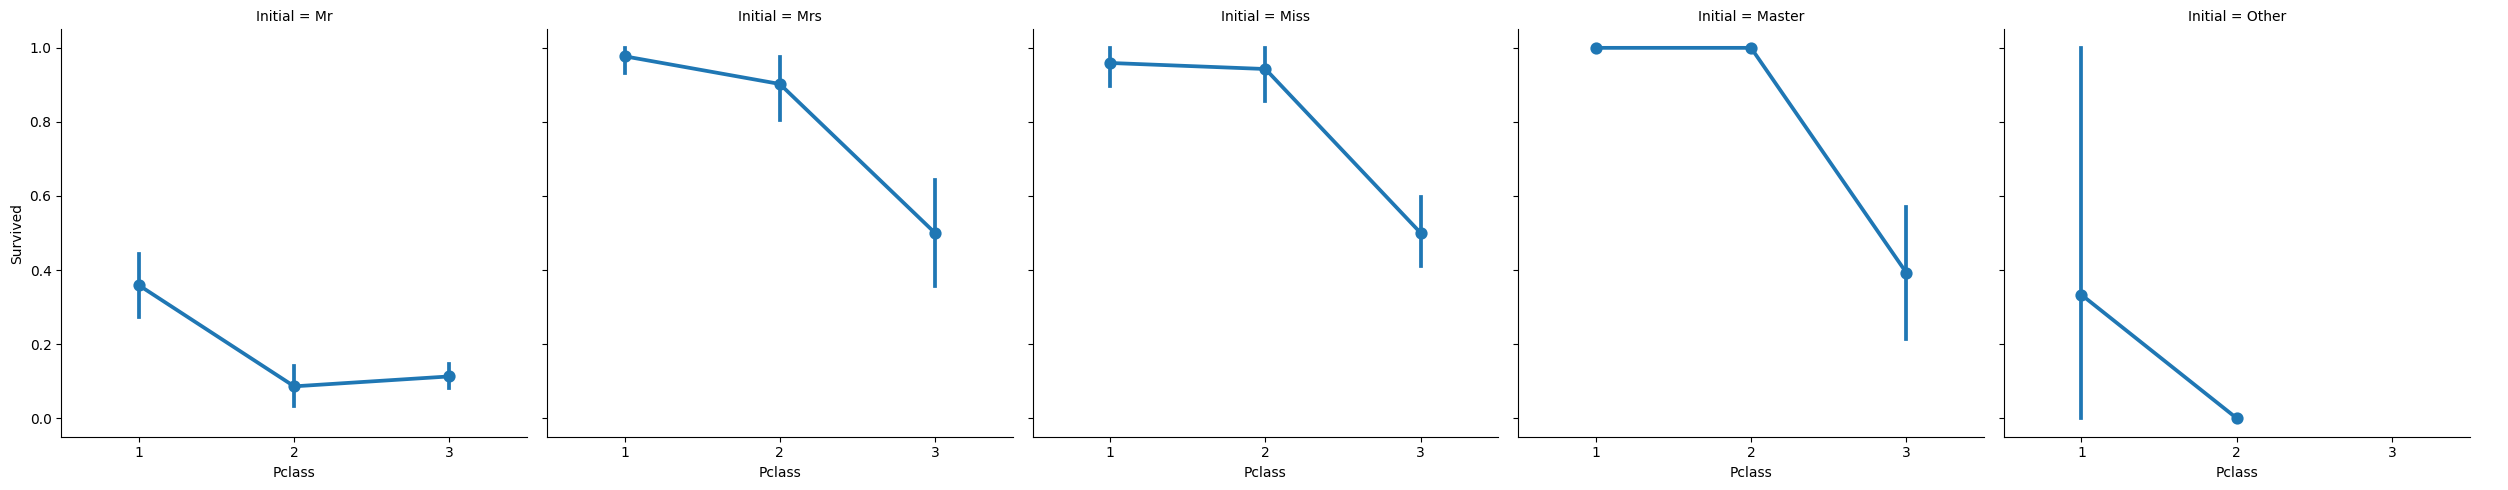

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=df,kind='point')
plt.show()

In [ ]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='PuOr_r')

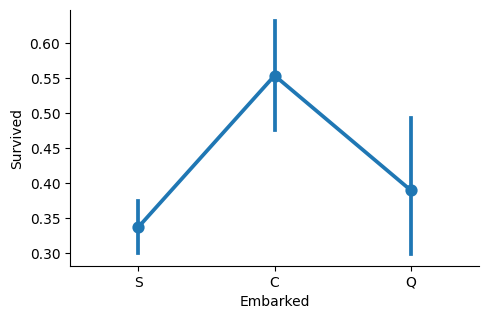

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=df,kind='point')
f=plt.gcf()
f.set_size_inches(5,3)

plt.show()

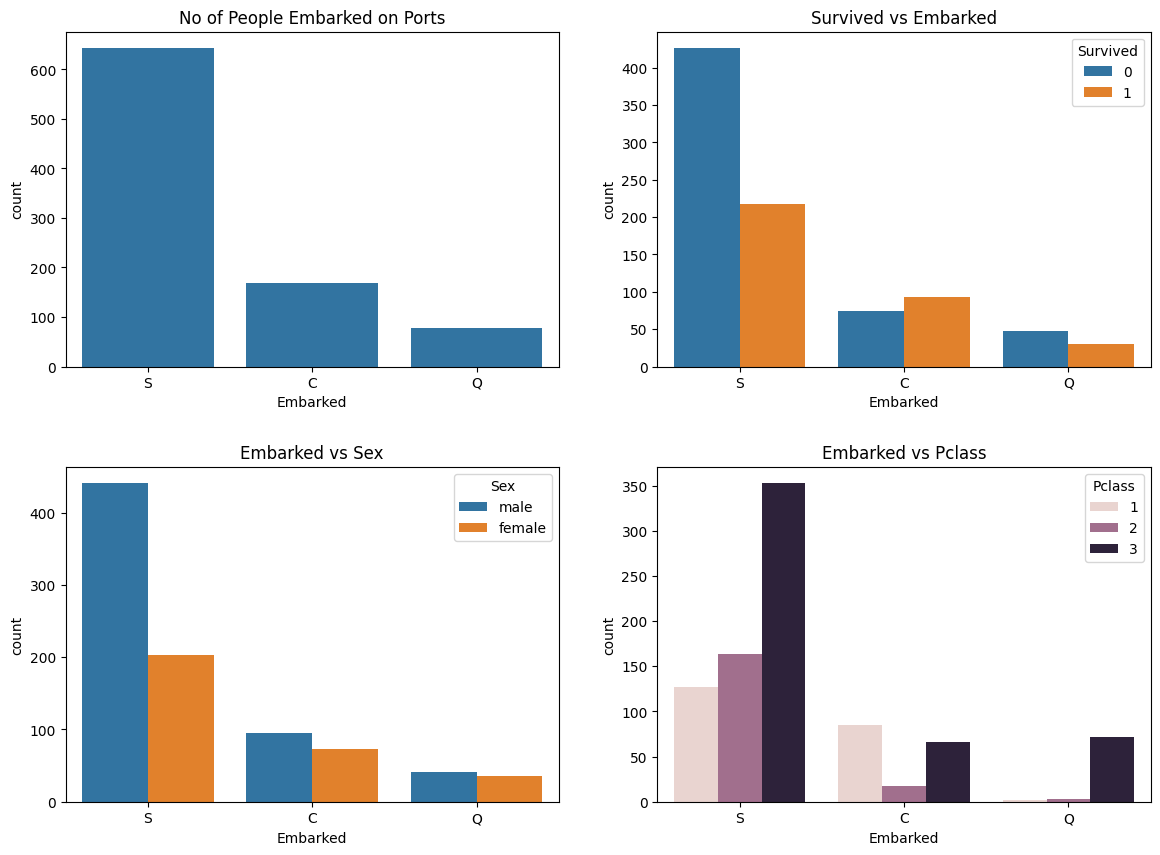

In [ ]:
f,ax = plt.subplots(2,2,figsize=[14,10])

sns.countplot(x='Embarked',ax=ax[0,0],data=df)
ax[0,0].set_title('No of People Embarked on Ports')

sns.countplot(x='Embarked',hue='Survived',data=df,ax=ax[0,1])
ax[0,1].set_title('Survived vs Embarked')

sns.countplot(x='Embarked',hue='Sex',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Sex')

sns.countplot(x='Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()


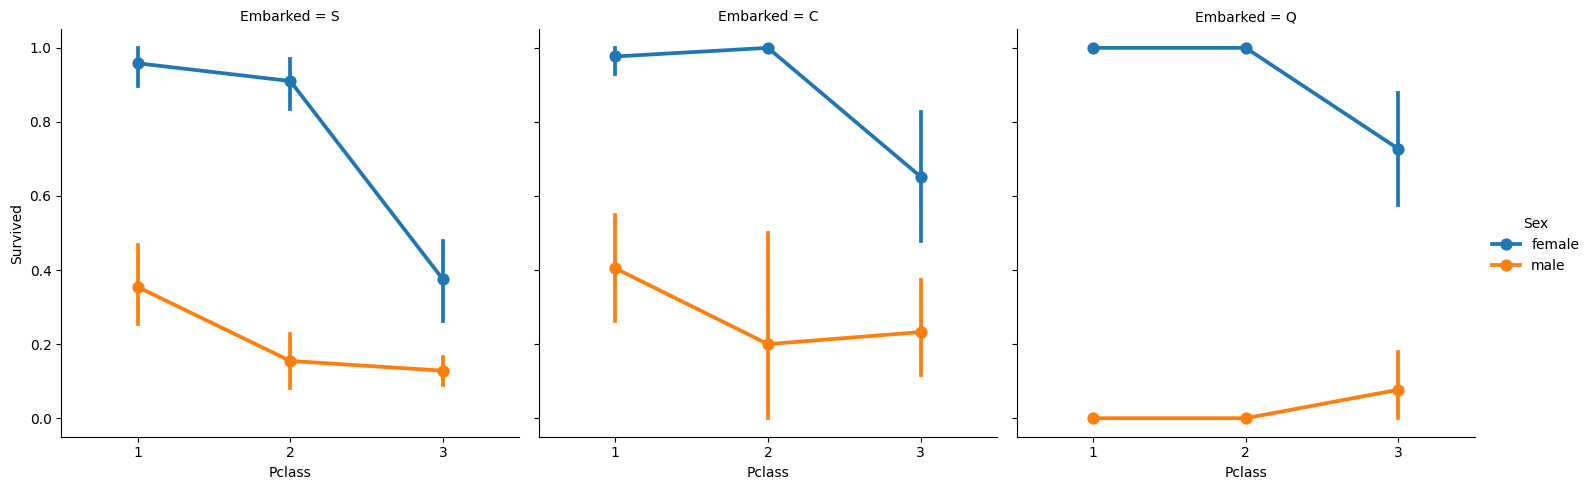

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=df,kind='point')
plt.show()

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


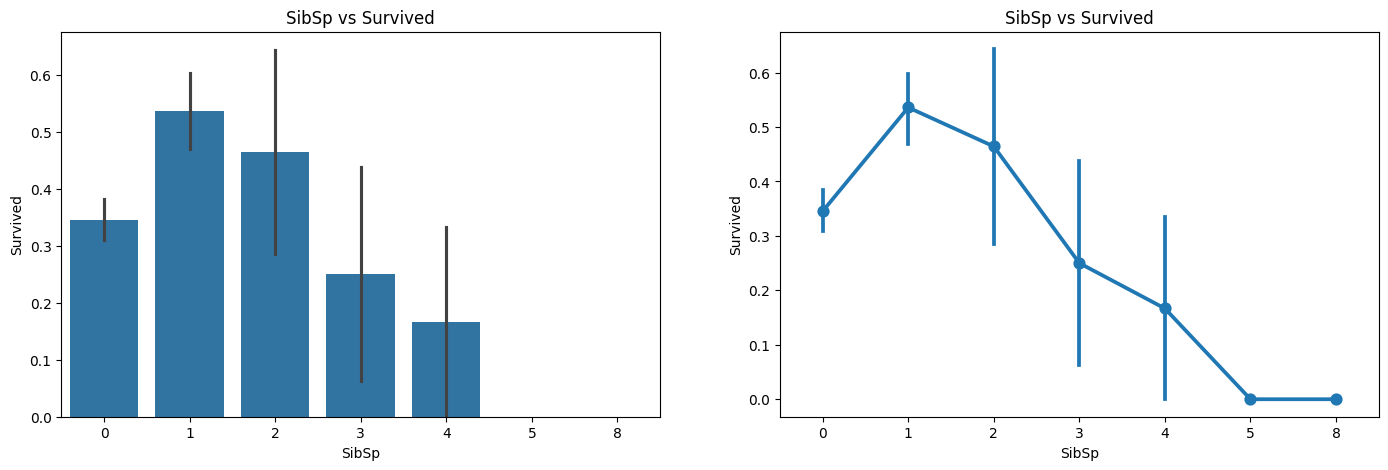

In [ ]:
f, ax = plt.subplots(1, 2, figsize=[17,5])
sns.barplot(x='SibSp', y='Survived', data=df, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=df, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [ ]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
print('Highest Fare was:',df['Fare'].max())
print('Lowest Fare was:',df['Fare'].min())
print('Average Fare was:',df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


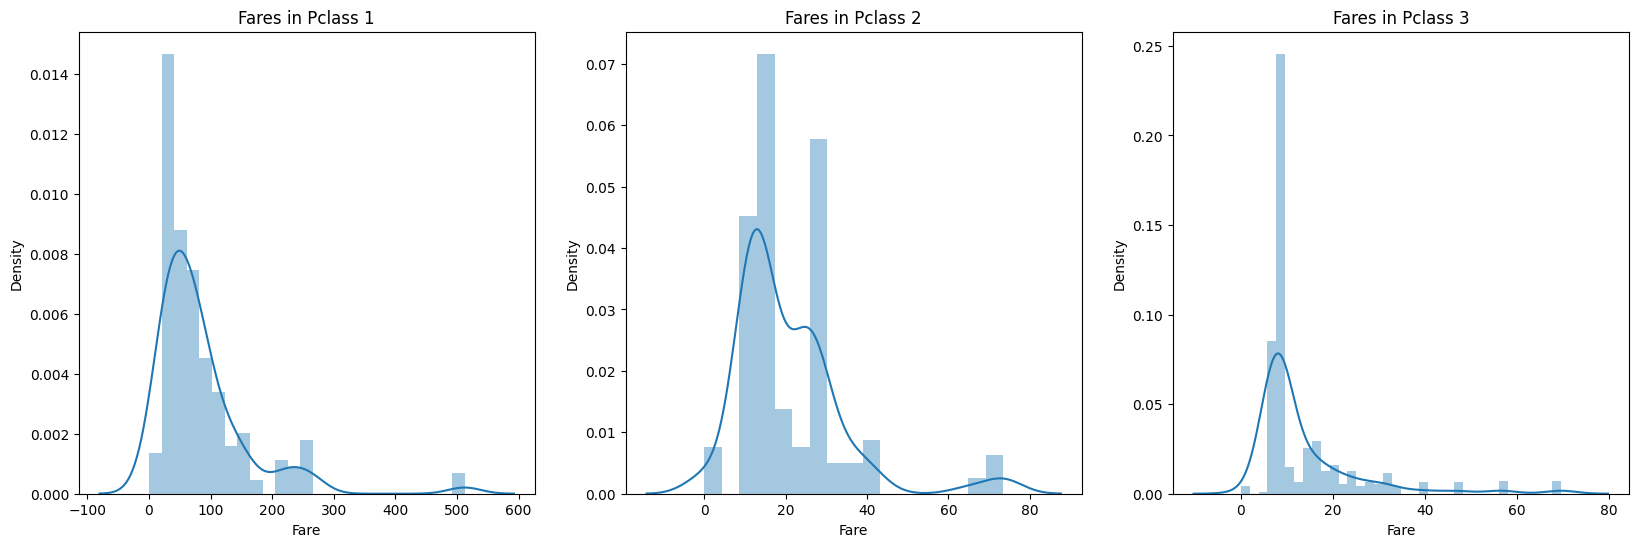

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,6))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

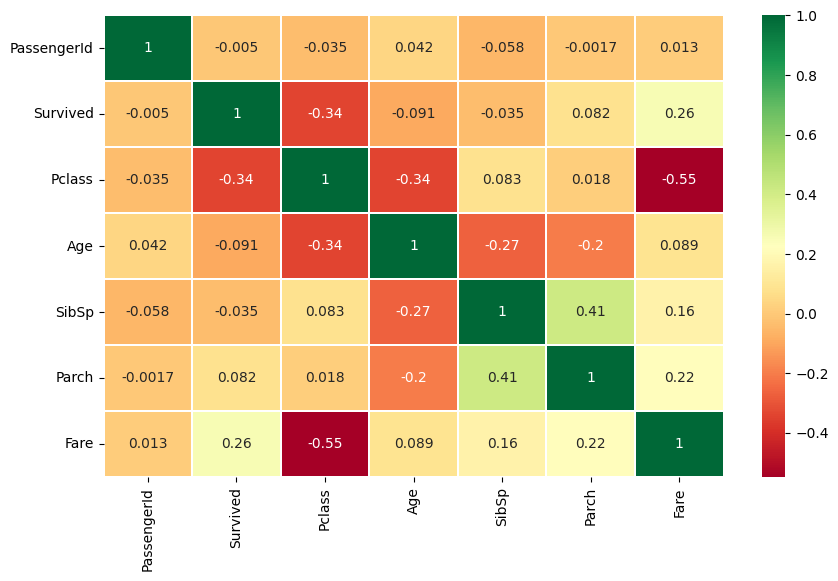

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Generate the heatmap using the correlation matrix of numerical features
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

In [ ]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


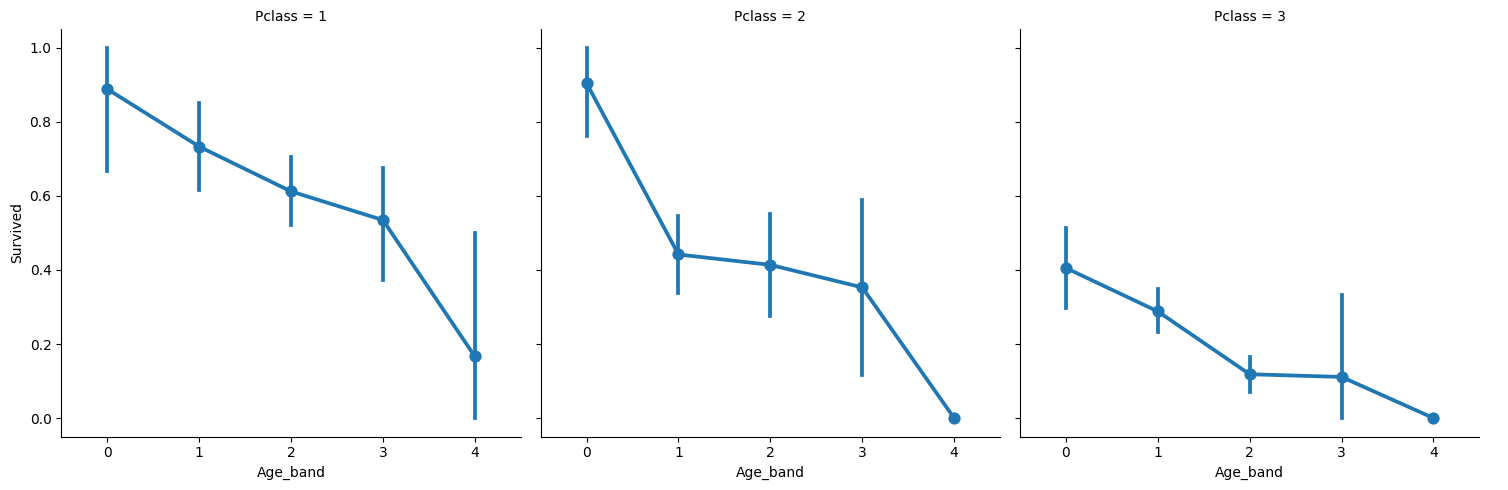

In [ ]:
sns.catplot(x='Age_band',y='Survived',data=df,col='Pclass',kind='point')
plt.show()

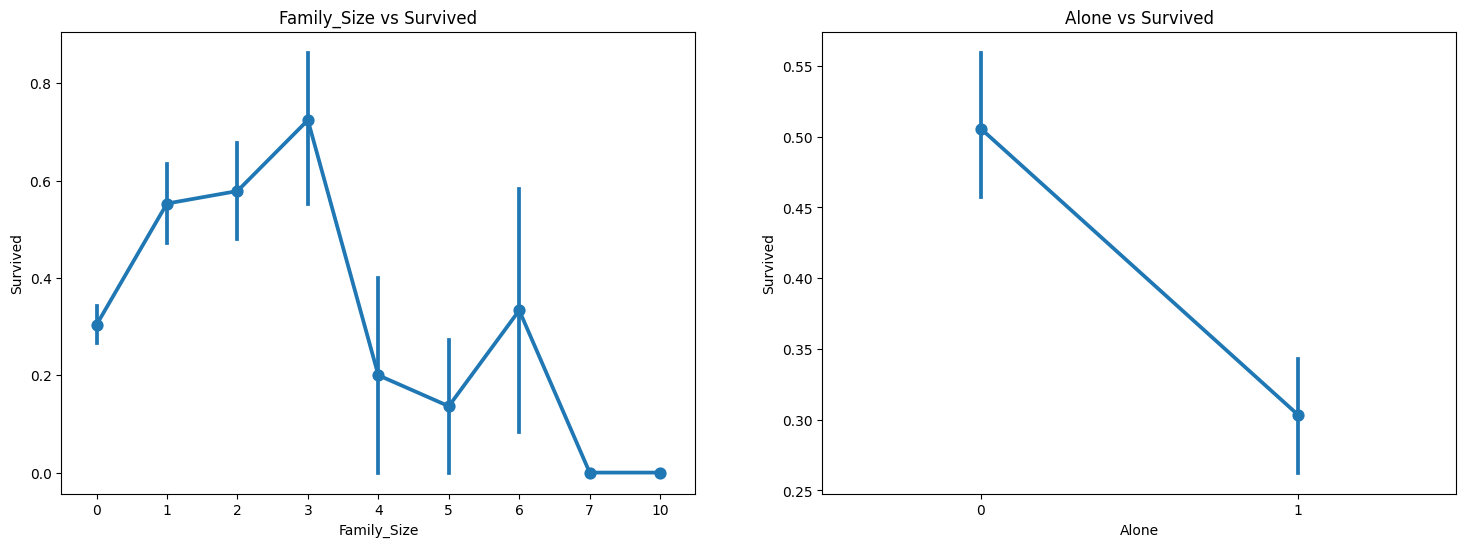

In [ ]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']#family size
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=df,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=df,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

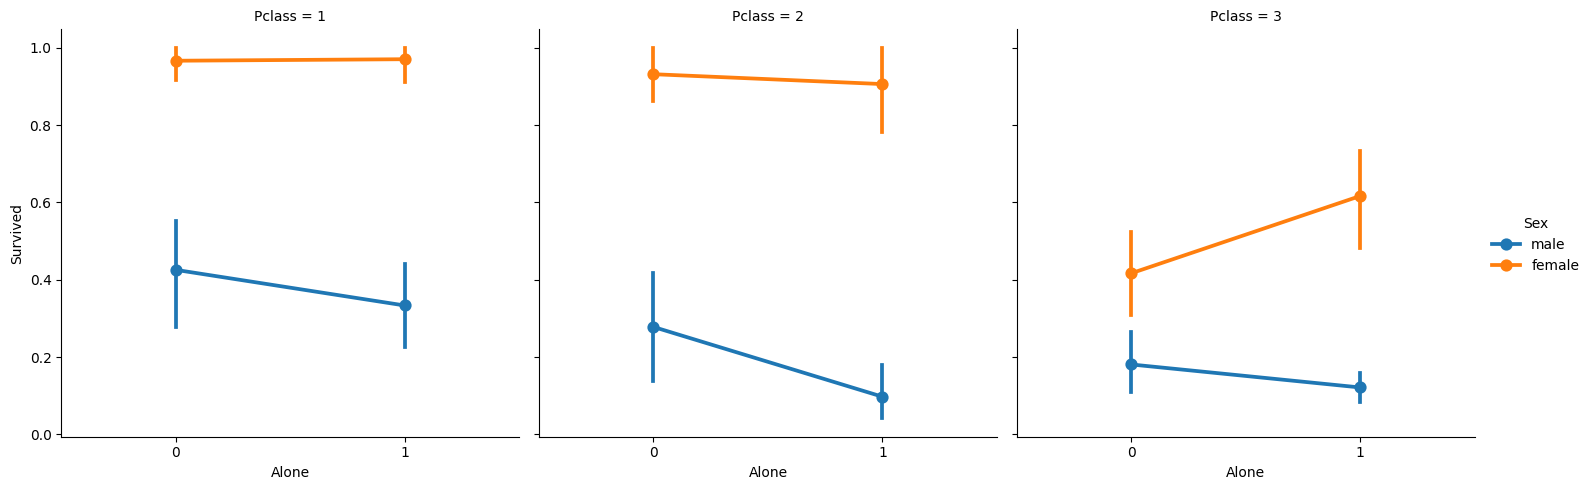

In [ ]:
sns.catplot(x='Alone',y='Survived',data=df,hue='Sex',col='Pclass',kind='point')
plt.show()

In [ ]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.91,'Fare_cat']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_cat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_cat']=3

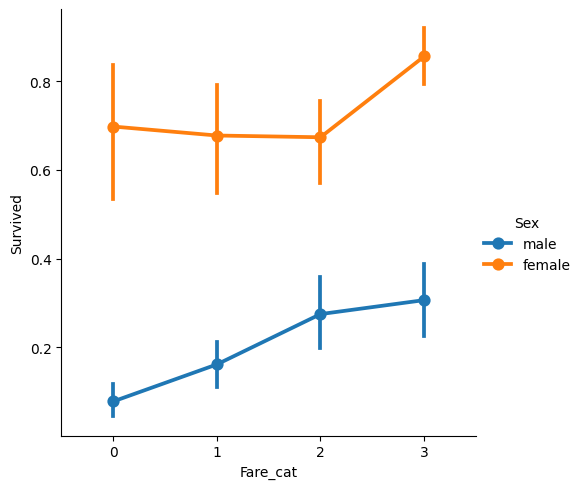

In [ ]:
sns.catplot(x='Fare_cat',y='Survived',data=df,hue='Sex',kind='point')
plt.show()

In [ ]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

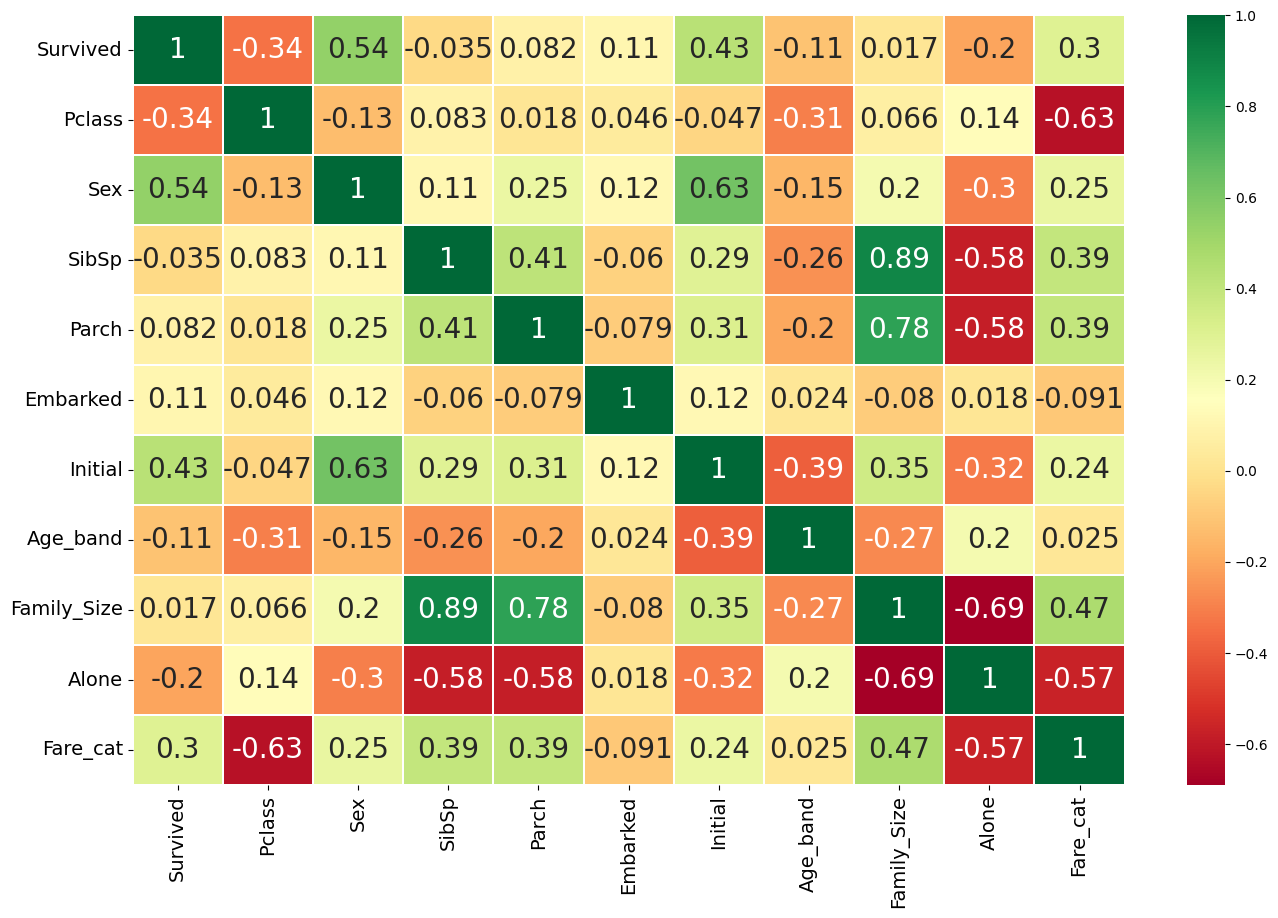

In [ ]:
# df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

##Radial Support Vector Machines(rbf-SVM)¶


In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.810424,0.045010
Decision Tree,0.812597,0.033926
Naive Bayes,0.801386,0.028999
Random Forest,0.810387,0.037343


<Axes: >

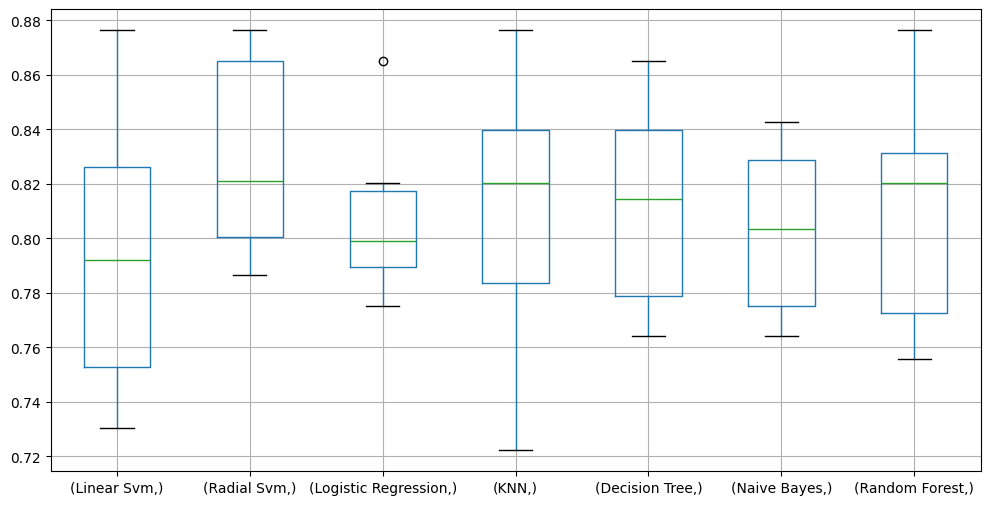

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

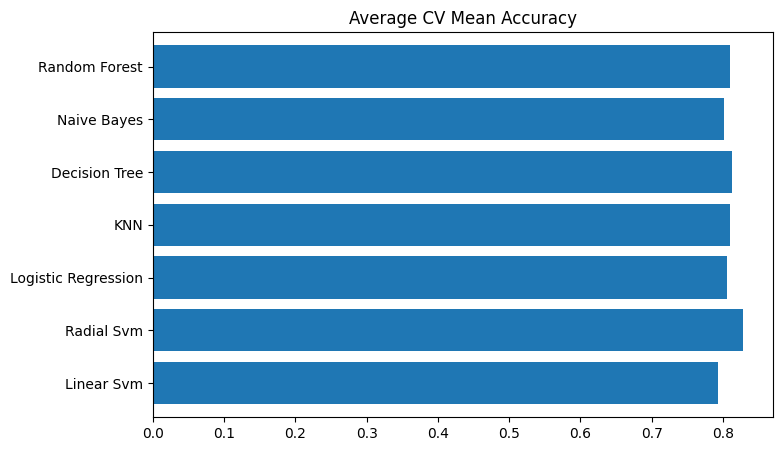

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

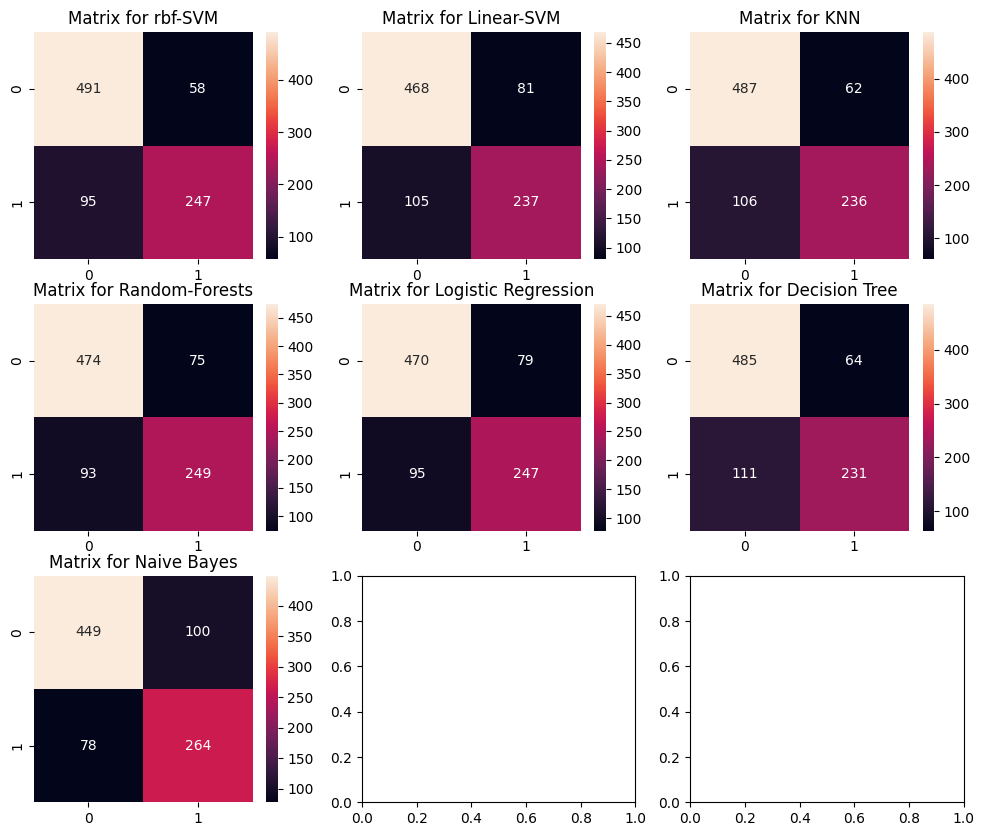

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8237952559300874


In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [ ]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()